In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_context('poster')

# TinyTag average temperatures

See e-mail from Liv Bente received 03/11/2017 at 15.24. Data for Alna, Glomma and Drammenselva needed to be downloaded from AM and added to Liv Bente's file.

In [2]:
# Input data
in_xlsx = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
           r'\Data\tiny_tag_temp\tiny_tag_data_lbs_tidied.xlsx')

# Rivers
riv_names = ['Numedalslagen', 'Skienselva', 'Otra', 'Orre', 'Alna', 'Vosso', 
             'Orkla', 'Vefsna', 'Altaelva', 'Glomma', 'Drammenselva']

# Container for data
df_list = []

# Loop over files
for name in riv_names:   
    # Read data
    df = pd.read_excel(in_xlsx, sheetname=name, index_col=0)
    df = df[['Temp_C']]
    
    # Monthly means
    df = df.resample('M').mean()
    
    # Get 2016 only
    df = df[df.index.year==2016]
    
    # Add site and month
    df['month'] = df.index.month
    df['site'] = name
    
    df_list.append(df)
    
# Combine
df = pd.concat(df_list, axis=0)

# Unstack
df2 = df.pivot(index='site', columns='month', values='Temp_C')

# Write output
out_csv = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
           r'\Data\tiny_tag_temp\tiny_tag_monthly_avgs.csv')
df2.to_csv(out_csv)

df2

month,1,2,3,4,5,6,7,8,9,10,11,12
site,,,,,,,,,,,,
Alna,0.983656,2.055095,3.573978,5.765431,10.124892,13.505722,14.870267,13.121540,13.017722,7.533024,3.768667,2.919207
Altaelva,0.041599,0.009885,0.156290,0.808708,3.713992,6.143764,7.795806,7.718347,6.562556,4.893755,2.647736,1.819651
Drammenselva,0.679381,0.807773,1.693230,3.801458,7.869019,14.924375,17.774099,16.692849,14.958472,8.170067,2.820417,0.922651
Glomma,0.195209,0.340618,1.773172,4.329667,9.012443,14.392250,16.788562,16.504315,15.008292,8.978642,4.000376,1.325568
Numedalslagen,0.310632,0.193032,0.895820,4.929153,9.850390,16.362667,17.469476,16.632809,15.541000,7.685040,2.149208,0.330054
Orkla,0.015161,0.252759,1.245161,2.381000,4.795806,10.610333,13.325484,11.804516,10.302333,4.608710,0.261667,0.134839
Orre,1.134355,2.736638,4.520753,8.312611,12.977285,16.773847,17.634812,16.339556,16.367986,8.871062,4.490694,4.742970
Otra,1.284086,1.075201,1.769247,4.415861,8.593858,14.761042,17.312930,16.594879,15.661653,9.388589,4.176569,2.762151
Skienselva,3.478669,2.514195,2.541384,3.605639,5.498656,11.842750,15.938212,16.453239,15.729444,11.565390,6.621847,4.369180


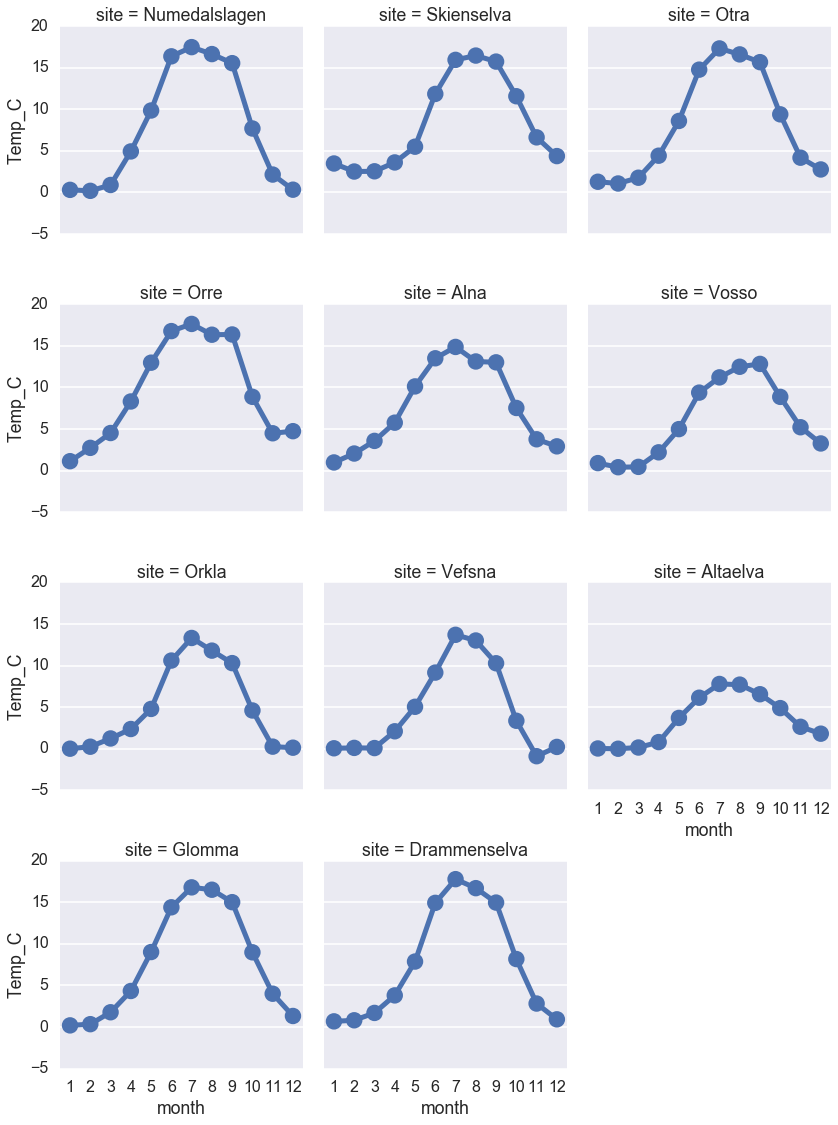

In [5]:
# Plot
sn.factorplot(x='month', y='Temp_C', col='site', data=df, col_wrap=3)
out_png = (r'C:\Data\James_Work\Staff\Oeyvind_K\Elveovervakingsprogrammet'
           r'\Data\tiny_tag_temp\monthly_water_temp.png')
plt.savefig(out_png, dpi=200)